In [1]:
# From book "人工智能数学基础"

In [2]:
from sklearn import datasets
from keras.models import Sequential

In [3]:
from keras.layers import Dense

In [4]:
import matplotlib.pyplot as plt

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Prepare data

In [9]:
#dataset = datasets.load_boston()

In [10]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [13]:
data[1:10],target[1:10]

(array([[2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
         6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
         1.7800e+01, 3.9690e+02, 9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
         7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
         1.7800e+01, 3.9283e+02, 4.0300e+00],
        [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
         6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
         1.8700e+01, 3.9463e+02, 2.9400e+00],
        [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
         7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
         1.8700e+01, 3.9690e+02, 5.3300e+00],
        [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
         6.4300e+00, 5.8700e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
         1.8700e+01, 3.9412e+02, 5.2100e+00],
        [8.8290e-02, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01,
         6.

In [14]:
x = data

In [15]:
y = target

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [19]:
len(x_train), len(x_test), len(y_train), len(y_test)

(404, 102, 404, 102)

In [24]:
# Model
model = Sequential()
model.add(Dense(units=12, activation='relu', input_dim=13))

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 12)                168       
                                                                 
Total params: 168 (672.00 Byte)
Trainable params: 168 (672.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model.add(Dense(units=8, activation='relu'))

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 12)                168       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
Total params: 272 (1.06 KB)
Trainable params: 272 (1.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.add(Dense(units=1))

In [31]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics='mse')

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 12)                168       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
# Train the model
history = model.fit(x_train, y_train, epochs=500, batch_size=5, validation_split=0.2)

Epoch 1/500
65/65 [==============================] - 2s 8ms/step - loss: 204.2546 - mse: 204.2546 - val_loss: 98.4760 - val_mse: 98.4760
Epoch 2/500
65/65 [==============================] - 0s 4ms/step - loss: 97.0496 - mse: 97.0496 - val_loss: 66.9346 - val_mse: 66.9346
Epoch 3/500
65/65 [==============================] - 0s 4ms/step - loss: 83.9577 - mse: 83.9577 - val_loss: 59.6323 - val_mse: 59.6323
Epoch 4/500
65/65 [==============================] - 0s 4ms/step - loss: 76.6793 - mse: 76.6793 - val_loss: 55.3473 - val_mse: 55.3473
Epoch 5/500
65/65 [==============================] - 0s 4ms/step - loss: 70.4041 - mse: 70.4041 - val_loss: 52.3022 - val_mse: 52.3022
Epoch 6/500
65/65 [==============================] - 0s 3ms/step - loss: 69.0276 - mse: 69.0276 - val_loss: 46.3235 - val_mse: 46.3235
Epoch 7/500
65/65 [==============================] - 0s 2ms/step - loss: 65.9743 - mse: 65.9743 - val_loss: 49.9991 - val_mse: 49.9991
Epoch 8/500
65/65 [==============================] - 

In [36]:
# Evaluate model result

In [37]:
scores = model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 20.1800 - mse: 20.1800


In [39]:
print('%s:%.2f'%(model.metrics_names[1],scores[1]))

mse:20.18


dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


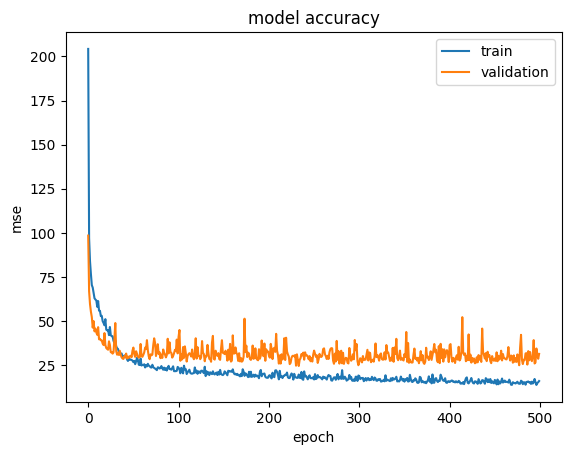

In [49]:
print(history.history.keys())
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model accuracy')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation',], loc='upper right')
plt.show()

In [42]:
history.history['mse']

[204.25457763671875,
 97.0495834350586,
 83.95774841308594,
 76.67926025390625,
 70.40409851074219,
 69.02758026123047,
 65.97427368164062,
 62.924346923828125,
 62.24090576171875,
 61.7137451171875,
 58.12455749511719,
 61.361785888671875,
 55.92790222167969,
 55.862403869628906,
 52.84096145629883,
 53.004112243652344,
 49.99449920654297,
 48.928688049316406,
 47.64457321166992,
 51.118675231933594,
 45.14756393432617,
 44.78731918334961,
 44.98773956298828,
 42.0606575012207,
 46.66749954223633,
 42.00617218017578,
 41.48197555541992,
 41.41720962524414,
 38.86330795288086,
 37.70201110839844,
 39.027801513671875,
 35.682167053222656,
 34.67612075805664,
 34.21238708496094,
 32.3619384765625,
 31.35698127746582,
 31.436904907226562,
 31.705259323120117,
 29.57196617126465,
 30.275606155395508,
 30.30485725402832,
 30.73501968383789,
 30.068452835083008,
 28.298145294189453,
 27.43130874633789,
 29.137048721313477,
 28.09790802001953,
 28.13618278503418,
 27.988431930541992,
 27.6306